# 範例重點
學習如何在 keras 中加入 reduce learning rate <br />
知道如何設定 reduce_lr 的監控目標 <br />
比較使用有無使用 reduce_lr 時的 performance

In [1]:
import os 
import keras

#os.environ["CUDA_VISIBLE_DEVICES"] = " "
!nvidia-smi

Using TensorFlow backend.


Wed Jul 24 00:52:01 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    32W /  70W |    807MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

In [0]:
def preproc_x(x, flatten = True):
  x = x/255.0
  if flatten:
    x = x.reshape((len(x),-1))
  return x

def preproc_y(y, num_classes = 10):
  if y.shape[-1] == 1 :
    y = keras.utils.to_categorical(y, num_classes)
  return y

In [0]:
train_x = preproc_x(train_x)
test_x = preproc_x(test_x)
train_y = preproc_y(train_y)
test_y = preproc_y(test_y)

In [0]:
def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128]):
  
  input_layer = keras.layers.Input(input_shape)
  
  for i, n_units in enumerate(num_neurons):
    if i == 0:
      x = keras.layers.Dense(units = n_units, name = 'hidden_layer_'+str(i+1))(input_layer)
      x = keras.layers.BatchNormalization()(x)
      x = keras.layers.Activation('relu')(x)
  else:
      x = keras.layers.Dense(units = n_units, name = 'hidden_layer_'+str(i+1))(x)
      x = keras.layers.BatchNormalization()(x)
      x = keras.layers.Activation('relu')(x)
      
  output_layer = keras.layers.Dense(units = output_units, activation = 'softmax')(x)
  model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
  return model

In [0]:
lr = 1e-3
momentum = 0.95
epochs = 50
batch_size = 1024

In [0]:
reduce_lr = keras.callbacks.ReduceLROnPlateau( factor = 0.1, min_lr = 1e-7, monitor = 'val_loss', patience = 5, verbose = 1)

In [0]:
model = build_mlp(train_x.shape[1:])
optimizer = keras.optimizers.SGD(lr = lr, nesterov = True, momentum = momentum)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = epochs, batch_size = batch_size, shuffle = True,
                                  validation_data = [test_x, test_y], callbacks = [reduce_lr])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 512)               1573376   
_________________________________________________________________
batch_normalization_38 (Batc (None, 512)               2048      
_________________________________________________________________
activation_38 (Activation)   (None, 512)               0         
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 128)               65664     
_________________________________________________________________
batch_normalization_39 (Batc (None, 128)               512       
_________________________________________________________________
activation_39 (Activation)   (None, 128)               0         
__________

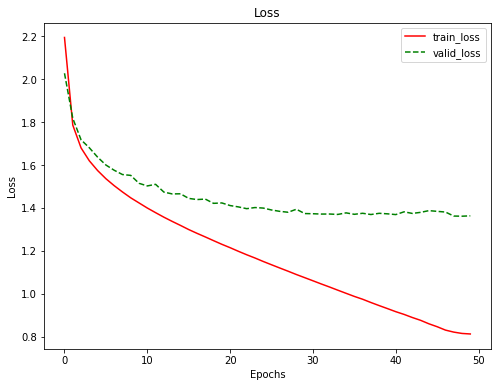

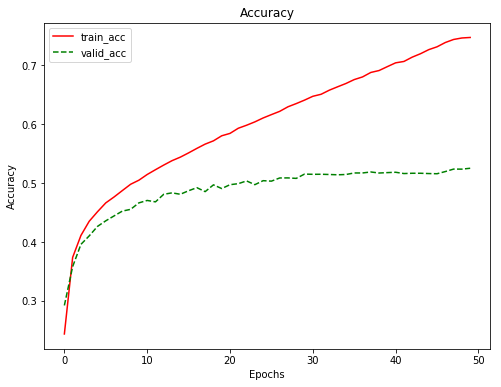

In [0]:
import matplotlib.pyplot  as plt
%matplotlib inline

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], '-', label = 'train_loss', color = 'r')
plt.plot(history.history['val_loss'], '--', label = 'valid_loss', color = 'g')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['acc'], '-', label = 'train_acc', color = 'r')
plt.plot(history.history['val_acc'], '--', label = 'valid_acc', color = 'g')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Work
請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響 <br />
請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [0]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

In [0]:
train_x = preproc_x(train_x, False)
test_x = preproc_x(test_x, False)
train_y = preproc_y(train_y)
test_y = preproc_y(test_y)

In [0]:
def build_mlp2(input_shape, output_units = 10):
  
  input_layer = keras.layers.Input(input_shape)
  
  x = keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same')(input_layer)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation('relu')(x)
  x = keras.layers.MaxPooling2D(pool_size = (2,2))(x)
  x = keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation('relu')(x)
  x = keras.layers.MaxPooling2D(pool_size = (2,2))(x)
  x = keras.layers.Dropout(0.25)(x)
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dense(units = 256)(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation('relu')(x)
  x = keras.layers.Dropout(0.25)(x)
  x = keras.layers.Dense(units = 128)(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation('relu')(x)
  x = keras.layers.Dense(units = 64)(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation('relu')(x)
  
  output_layer = keras.layers.Dense(units = 10, activation = 'softmax')(x)
  model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
  
  return model

In [0]:
lr = 1e-3
batch_size = 128
epochs = 50

opts = [
    keras.optimizers.SGD(lr = lr, nesterov = True, momentum = 0.95),
    keras.optimizers.Adam(lr = lr),
    keras.optimizers.RMSprop(lr = lr)
]

opts_name = ["SGD", "Adam", "RMSprop"]
reduce_lr_factor = [0.9, 0.5, 0.2]
reduce_lr_patience = [5,10,20]

In [0]:
results = {}

for i,opt in enumerate(opts):
  
  print("-"*100)
  print(f"Training with {opts_name[i]} optimizer")
  print("-"*100)

  for factor in reduce_lr_factor:
    for patience in reduce_lr_patience:
      
      model = build_mlp2(train_x.shape[1:])
      model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ['accuracy'])
      print(f"Exp with {factor} reduce_lr_factor and {patience} reduce_lr_patience")
      
      
      reduce_lr = keras.callbacks.ReduceLROnPlateau(factor = factor, patience = patience, verbose = 1, monitor = 'val_loss',min_lr = 1e-8)
      
      history = model.fit(train_x, train_y, batch_size = batch_size, epochs = epochs, shuffle = True, validation_data = [test_x, test_y], callbacks = [reduce_lr])
      
      name_tag = f"{opts_name[i]}_{factor}_{patience}"
      
      results[name_tag] = {
          "train_loss" : history.history["loss"],
          "valid_loss" : history.history["val_loss"],
          "train_acc" : history.history["acc"],
          "valid_acc" : history.history["val_acc"]
      }
       

----------------------------------------------------------------------------------------------------
Training with SGD optimizer
----------------------------------------------------------------------------------------------------
Exp with 0.9 reduce_lr_factor and 5 reduce_lr_patience
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.8900 - acc: 0.3220 - val_loss: 1.5444 - val_acc: 0.4368
Epoch 2/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.5143 - acc: 0.4481 - val_loss: 1.5904 - val_acc: 0.4262
Epoch 3/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.3669 - acc: 0.5046 - val_loss: 1.3732 - val_acc: 0.5087
Epoch 4/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.2670 - acc: 0.5431 - val_loss: 1.2180 - val_acc: 0.5672
Epoch 5/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.1882 - acc: 0.5727 - val_loss:

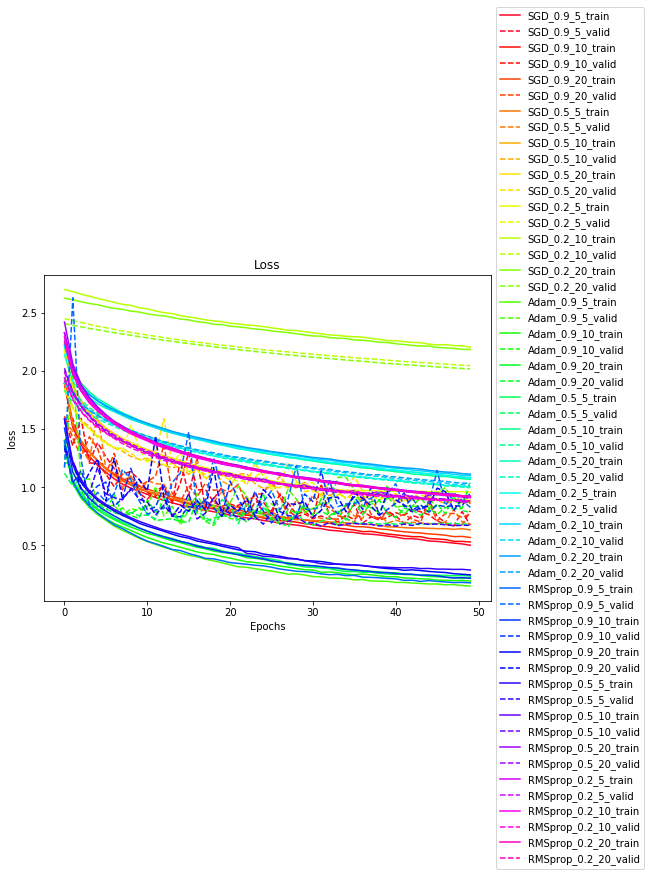

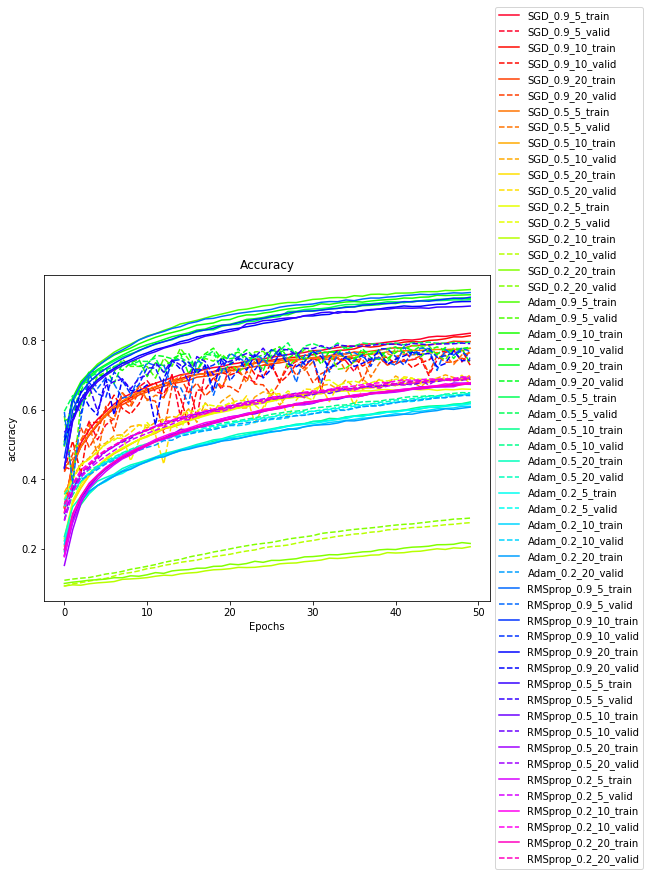

In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors

%matplotlib inline
num_colors = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm = colors.Normalize(vmin = 0, vmax = num_colors-1)
scalarMap = mplcm.ScalarMappable(norm = cNorm, cmap = cm)
color_bar = [scalarMap.to_rgba(i) for i in range(num_colors)]


plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
  plt.plot(results[cond]['train_loss'], '-', label = cond + "_train", color = color_bar[i])
  plt.plot(results[cond]['valid_loss'],'--', label = cond + "_valid", color = color_bar[i])
  
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5))
plt.show()

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
  plt.plot(results[cond]['train_acc'],'-', label = cond + "_train", color = color_bar[i])
  plt.plot(results[cond]['valid_acc'],'--', label = cond + "_valid", color = color_bar[i])

plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()